In [1]:
number = 42

42

In [2]:
function ∆(value, number)
    number - value
end

∆ (generic function with 1 method)

In [3]:
function top_survivors(values, number, top_percent = 10)
    errors_and_values = [(abs(∆(value, number)), value) for value in values]
    sorted_errors_and_values = sort(errors_and_values)
    end_number = Int(length(values) * top_percent / 100)
    sorted_errors_and_values[1:end_number]
end

top_survivors (generic function with 2 methods)

In [4]:
function mutate(value, mutations = 10)
    [value + rand() - 0.5 for i in 1:mutations]
end

mutate (generic function with 2 methods)

In [5]:
mutate(10)

10-element Vector{Float64}:
  9.73380021057524
  9.95323950605933
 10.384684056619655
  9.618586529914806
 10.423221444180516
 10.197048062784722
 10.295786635439745
  9.505994412155879
 10.18571277250831
 10.020665150087483

In [9]:
function mutate_list(list, mutations = 10)
    output = []
    for element in list
        output = vcat(output, mutate(element, mutations))
    end
    output
end

mutate_list (generic function with 2 methods)

In [11]:
mutate_list([10, 20])

20-element Vector{Any}:
  9.768930138761831
  9.642329893860902
  9.948378695473565
  9.626249508587719
 10.173929486110294
  9.53791367352348
 10.383344804957403
  9.564053008454975
  9.658995526741935
 10.177269652218747
 19.561663449759212
 20.013048175648915
 19.917015577257896
 20.496309832863247
 19.67297718299922
 19.860122972735844
 20.11757326630325
 20.463303217386297
 20.442174258821115
 20.3400121736004

In [13]:
initial_values = rand(500)
survivors = initial_values
generations = 500
top_survivors_sample = []

Any[]

In [14]:
for generation in 1:generations
    survivors = mutate_list(survivors)
    errors_and_values = top_survivors(survivors, number)
    survivors = [value for (error, value) in errors_and_values]
    push!(top_survivors_sample, survivors[1:10])
    
    if (generation == 1) || (generation % 10 == 0)
        println(generation, " => ", survivors[1:5])
    end
end

1 => [1.4781098526920151, 1.477599249623369, 1.4681064506853514, 1.467897846949232, 1.465872410661688]
10 => [5.602038509439772, 5.595695131253283, 5.593562369255764, 5.57554639936432, 5.572182631305215]
20 => [10.247502366328254, 10.22608600639384, 10.220143223184394, 10.208110102950876, 10.206964491751059]
30 => [14.932393494625966, 14.867223636964416, 14.862284724980888, 14.84995999930051, 14.843876583596904]
40 => [19.509216446558973, 19.48999660810677, 19.450476897964812, 19.444734862253704, 19.44422781198143]
50 => [24.10790780082977, 24.06482120707057, 24.06385228805042, 24.054391353870606, 24.04808842047422]
60 => [28.713499277502464, 28.708412800678982, 28.654250257955916, 28.648165313634358, 28.644456895963412]
70 => [33.252744458733794, 33.24475272908504, 33.24164726924335, 33.23483076331214, 33.22989196188619]
80 => [37.9244733611866, 37.894040759508236, 37.88196115910731, 37.88051803817319, 37.87277363639728]
90 => [41.999815154736865, 42.000256248812505, 41.9996208280196,

In [15]:
plotting_range = 1 : generations

1:500

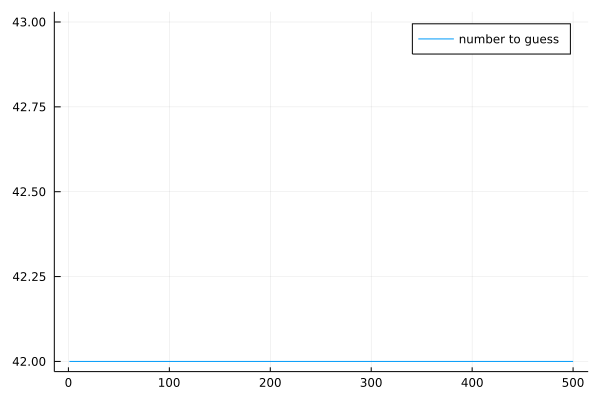

In [16]:
using Plots
progress_plot = plot(plotting_range, fill(number, generations), label = "number to guess")

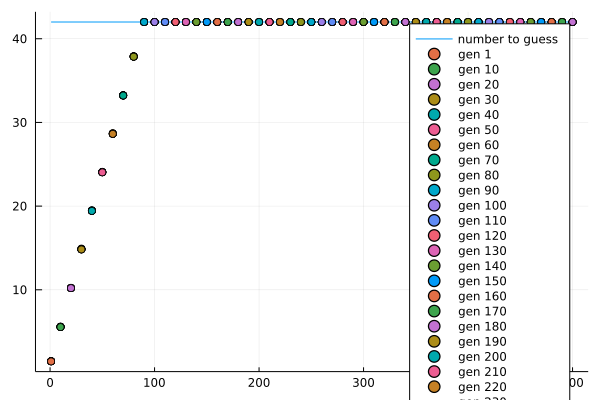

In [17]:
for i in plotting_range
    if (i == 1) || (i % 10 == 0)
        plot!(progress_plot, fill(i, 10), top_survivors_sample[i], label = "gen $i", seriestype = :scatter)
    end
end

progress_plot

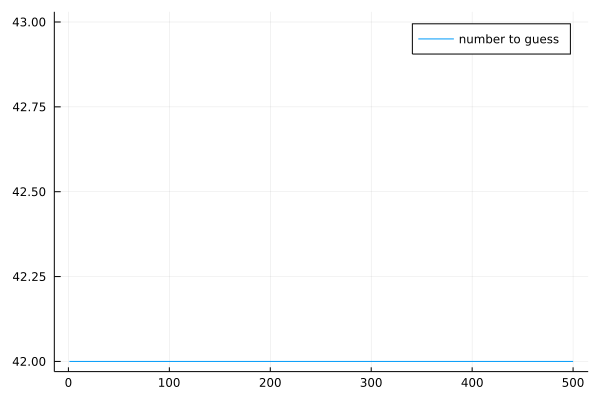

In [18]:
fine_grain_plot = plot(plotting_range, fill(number, generations), label = "number to guess")

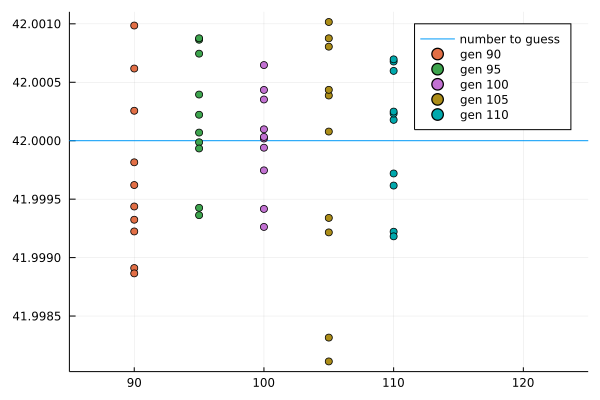

In [20]:
for i in 90:110
    if (i % 5 == 0)
        plot!(fine_grain_plot, fill(i, 10), top_survivors_sample[i], label = "gen $i", seriestype = :scatter)
    end
end

fine_grain_plot

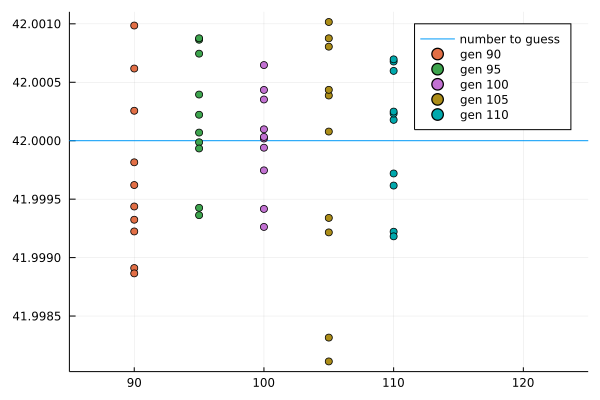

In [21]:
plot!(fine_grain_plot, xlims = (85, 125))